In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gpreda/covid19-world-testing-progress

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
covid19-world-testing-progress.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
! mkdir train
! unzip /content/covid19-world-testing-progress.zip -d train

Archive:  /content/covid19-world-testing-progress.zip
  inflating: train/covid-testing.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
data = pd.read_csv('/content/train/covid-testing.csv')
data.head(8)

,Entity,ISO code,Date,Source URL,Source label,Notes,Daily change in cumulative total,Cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,7-day smoothed daily change,7-day smoothed daily change per thousand,Short-term positive rate,Short-term tests per case
0,Albania - tests performed,ALB,2020-02-25,https://shendetesia.gov.al/koronavirusi-mshms-...,Ministry of Health and Social Protection,NaN,8.0,8.0,0.003,0.003,NaN,NaN,NaN,NaN
1,Albania - tests performed,ALB,2020-02-26,https://shendetesia.gov.al/fond-shtese-per-mas...,Ministry of Health and Social Protection,NaN,5.0,13.0,0.005,0.002,NaN,NaN,NaN,NaN
2,Albania - tests performed,ALB,2020-02-27,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,4.0,17.0,0.006,0.001,NaN,NaN,NaN,NaN
3,Albania - tests performed,ALB,2020-02-28,http://shendetesia.gov.al/manastirliu-asnje-ra...,Ministry of Health and Social Protection,NaN,1.0,18.0,0.006,0.000,NaN,NaN,NaN,NaN
4,Albania - tests performed,ALB,2020-02-29,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,8.0,26.0,0.009,0.003,NaN,NaN,NaN,NaN
5,Albania - tests performed,ALB,2020-03-01,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,3.0,29.0,0.010,0.001,NaN,NaN,NaN,NaN
6,Albania - tests performed,ALB,2020-03-02,https://shendetesia.gov.al/vigjilence-e-shtuar...,Ministry of Health and Social Protection,NaN,2.0,31.0,0.011,0.001,NaN,NaN,NaN,NaN
7,Albania - tests performed,ALB,2020-03-03,https://shendetesia.gov.al/3-mars-2020-informa...,Ministry of Health and Social Protection,NaN,5.0,36.0,0.013,0.002,4.0,0.001,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57636 entries, 0 to 57635
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Entity                                         57636 non-null  object 
 1   ISO code                                       57636 non-null  object 
 2   Date                                           57636 non-null  object 
 3   Source URL                                     49915 non-null  object 
 4   Source label                                   50114 non-null  object 
 5   Notes                                          6044 non-null   object 
 6   Daily change in cumulative total               48056 non-null  float64
 7   Cumulative total                               47757 non-null  float64
 8   Cumulative total per thousand                  47757 non-null  float64
 9   Daily change in cumulative total per thousand  480

In [7]:
len(data)

57636

In [8]:
d = data[['Entity','Cumulative total','Daily change in cumulative total','Date']].groupby('Entity').max()
d = d.reset_index()
d[d['Entity'] == 'India - samples tested']

,Entity,Cumulative total,Daily change in cumulative total,Date
53,India - samples tested,452939545.0,3740296.0,2021-07-23


In [9]:
data['Entity'].unique()[:2]

array(['Albania - tests performed', 'Andorra - people tested'],
      dtype=object)

In [10]:
#When did vaccination drive start in each country
data['Date']=pd.to_datetime(data['Date'])
data['Country'] = data['Entity'].apply(lambda x:x.split(' - ')[0].rstrip().lstrip())
data['Mode'] = data['Entity'].apply(lambda x:x.split(' - ')[1].rstrip().lstrip())
data[data['Mode'] == 'people tested']
data[['Country','Date']].groupby('Country').min().sort_values(by='Date', ascending=False)

,Date
Country,
Antigua and Barbuda,2021-07-13
Gabon,2021-07-13
Timor,2021-07-13
Equatorial Guinea,2021-07-12
Saint Kitts and Nevis,2021-07-12
...,...
Taiwan,2020-01-16
Thailand,2020-01-04
Peru,2020-01-01


In [11]:
data['Mode'].unique()

array(['tests performed', 'people tested', 'units unclear',
       'samples tested'], dtype=object)

In [12]:
tp = data[data['Mode'] == 'tests performed'] 
tp[tp['Mode'].duplicated()] #so duplicates exist
#r=tp[['Country', 'Date']].groupby('Country').min()
m_tp=tp[['Country','Date']].groupby('Country').agg(['min', 'max'])

pt = data[data['Mode'] == 'people tested'] 
pt[pt['Mode'].duplicated()] #so duplicates exist
m_pt=pt[['Country','Date']].groupby('Country').agg(['min', 'max'])

uu = data[data['Mode'] == 'units unclear'] 
uu[uu['Mode'].duplicated()] #so duplicates exist
m_uu=uu[['Country','Date']].groupby('Country').agg(['min', 'max'])

st = data[data['Mode'] == 'samples tested'] 
st[st['Mode'].duplicated()] #so duplicates exist
m_st=st[['Country','Date']].groupby('Country').agg(['min', 'max'])

#means country exists in both tp and pt dataframes
result = pd.concat([m_pt, m_tp], axis=1)
result = result.dropna()
result

Date                                 
              min        max        min        max
Canada 2020-03-11 2021-01-31 2020-01-31 2021-07-22
Italy  2020-04-19 2021-07-22 2020-02-24 2021-07-22

In [13]:
result = pd.concat([m_pt, m_uu], axis=1)
result = result.dropna()
result

Empty DataFrame
Columns: [(Date, min), (Date, max), (Date, min), (Date, max)]
Index: []

In [14]:
result = pd.concat([m_pt, m_st], axis=1)
result = result.dropna()
result

Date                                 
              min        max        min        max
Poland 2020-04-28 2021-07-22 2020-03-06 2021-07-22

In [15]:
result = pd.concat([m_tp, m_uu], axis=1)
result = result.dropna()
result

Empty DataFrame
Columns: [(Date, min), (Date, max), (Date, min), (Date, max)]
Index: []

In [16]:
result = pd.concat([m_tp, m_st], axis=1)
result = result.dropna()
result

Empty DataFrame
Columns: [(Date, min), (Date, max), (Date, min), (Date, max)]
Index: []

In [17]:
result = pd.concat([m_uu, m_st], axis=1)
result = result.dropna()
result

Empty DataFrame
Columns: [(Date, min), (Date, max), (Date, min), (Date, max)]
Index: []

In [18]:
data['Short-term tests per case'].unique()[:4]

array([ nan, 11.8, 11.3,  9.9])

In [20]:
fig=plt.figure(figsize=(20,10))
tp = data[data['Mode'] == 'tests performed'] 
sns.barplot(x='Date', y='Country', data = tp, palette='twilight_shifted')
plt.xlabel('Date')
plt.ylabel('Country')
plt.xticks(rotation=50)
plt.show()

TypeError: ignored

<Figure size 1440x720 with 0 Axes>

In [21]:
tp.columns
tp[['Country', 'Short-term positive rate']].groupby('Country').max()

,Short-term positive rate
Country,
Albania,0.409
Antigua and Barbuda,NaN
Argentina,0.439
Armenia,0.504
Australia,0.038
...,...
United Kingdom,0.300
United States,0.194
Uruguay,0.268


<Figure size 1008x360 with 0 Axes>

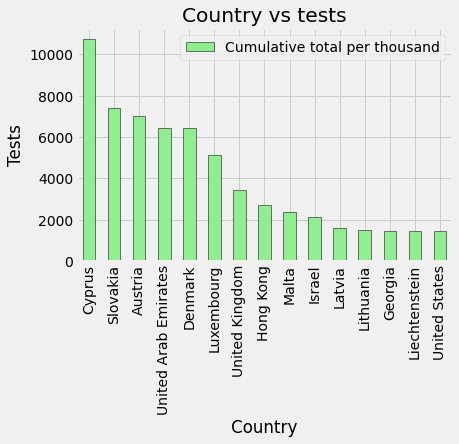

In [22]:
#Which country does more tests acc to tests performed
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,5))
tp[['Country', 'Cumulative total per thousand']].groupby('Country').max().sort_values(ascending=False, by='Cumulative total per thousand')[:15].plot(kind='bar', edgecolor='black', color='lightgreen', title='Country vs tests')
plt.xlabel('Country')
plt.ylabel('Tests')
plt.show()

In [23]:
#Where and when the positive rate is larger ? Is this improving (decreasing) over time?
tp.head(8)

,Entity,ISO code,Date,Source URL,Source label,Notes,Daily change in cumulative total,Cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,7-day smoothed daily change,7-day smoothed daily change per thousand,Short-term positive rate,Short-term tests per case,Country,Mode
0,Albania - tests performed,ALB,2020-02-25,https://shendetesia.gov.al/koronavirusi-mshms-...,Ministry of Health and Social Protection,NaN,8.0,8.0,0.003,0.003,NaN,NaN,NaN,NaN,Albania,tests performed
1,Albania - tests performed,ALB,2020-02-26,https://shendetesia.gov.al/fond-shtese-per-mas...,Ministry of Health and Social Protection,NaN,5.0,13.0,0.005,0.002,NaN,NaN,NaN,NaN,Albania,tests performed
2,Albania - tests performed,ALB,2020-02-27,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,4.0,17.0,0.006,0.001,NaN,NaN,NaN,NaN,Albania,tests performed
3,Albania - tests performed,ALB,2020-02-28,http://shendetesia.gov.al/manastirliu-asnje-ra...,Ministry of Health and Social Protection,NaN,1.0,18.0,0.006,0.000,NaN,NaN,NaN,NaN,Albania,tests performed
4,Albania - tests performed,ALB,2020-02-29,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,8.0,26.0,0.009,0.003,NaN,NaN,NaN,NaN,Albania,tests performed
5,Albania - tests performed,ALB,2020-03-01,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,3.0,29.0,0.010,0.001,NaN,NaN,NaN,NaN,Albania,tests performed
6,Albania - tests performed,ALB,2020-03-02,https://shendetesia.gov.al/vigjilence-e-shtuar...,Ministry of Health and Social Protection,NaN,2.0,31.0,0.011,0.001,NaN,NaN,NaN,NaN,Albania,tests performed
7,Albania - tests performed,ALB,2020-03-03,https://shendetesia.gov.al/3-mars-2020-informa...,Ministry of Health and Social Protection,NaN,5.0,36.0,0.013,0.002,4.0,0.001,NaN,NaN,Albania,tests performed


In [24]:
import plotly.express as px
fig = px.line(tp, x="Date", y="Short-term positive rate", title='Positive rate for countries', color='Country')
fig.show()

In [45]:
r=tp[['Country','Date','Short-term positive rate']].groupby('Country').max().sort_values(ascending=False, by='Short-term positive rate')[:4]
r=r.reset_index()
tp_filtered = tp[tp['Country'].isin(r['Country'])]
fig = px.line(tp_filtered, x="Date", y="Short-term positive rate", title='Positive rate for countries', color='Country')
# labels_to_show_in_legend = ["Country=Bolivia", "Country=Peru"]
# for trace in fig['data']:
#     if (not trace['name'] in labels_to_show_in_legend):
#         trace['showlegend'] = False
fig.show()

In [51]:
tp_filtered[tp_filtered['Country'] == 'Papua New Guinea'][:2]
tp_filtered = tp_filtered.dropna(subset=['Short-term positive rate'])
#Countries where short term positive rate is highest how is the cumulative tests rate?
fig = px.scatter(tp_filtered, x="Date", y="Cumulative total per thousand", title='Cumulative per thousand', color='Country', size='Short-term positive rate')
#so for papua new guinea (country with positive rate) has no info on cumlative per thousand column)
#all countries as tests increase positive rate increases
fig.show()

In [52]:
tp = tp.dropna(subset=['Short-term positive rate'])
#Countries where short term positive rate is highest how is the cumulative tests rate?
fig = px.scatter(tp, x="Date", y="Cumulative total per thousand", title='Cumulative per thousand', color='Country', size='Short-term positive rate')
#so for papua new guinea (country with positive rate) has no info on cumlative per thousand column)
#all countries as tests increase positive rate increases
fig.show()